In [14]:
import os, cv2, keras, json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
IMAGE_PATH = "Week3/data/Images"
ANNOTATION_PATH = "Week3/data/Airplanes_Annotations"

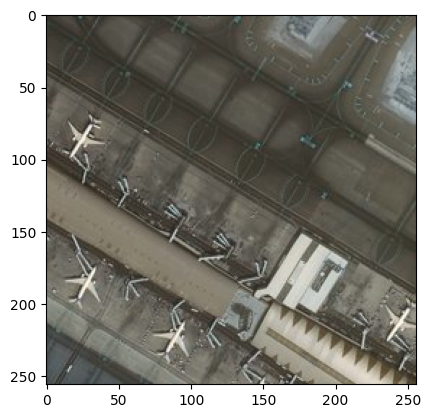

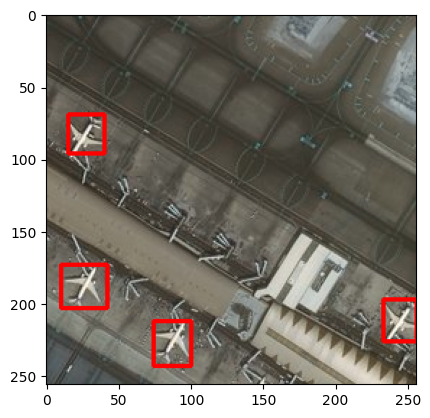

In [15]:
filename = "42845.jpg"
img = cv2.imread("/home/tuandinh/Desktop/Computer Vision ITMO/Week3/data/Images/42845.jpg")
df = pd.read_csv("/home/tuandinh/Desktop/Computer Vision ITMO/Week3/data/Airplanes_Annotations/42845.csv")
plt.imshow(img)
for row in df.iterrows():
    x1 = int(row[1][0].split(" ")[0])
    y1 = int(row[1][0].split(" ")[1])
    x2 = int(row[1][0].split(" ")[2])
    y2 = int(row[1][0].split(" ")[3])
    cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
plt.figure()
plt.imshow(img)

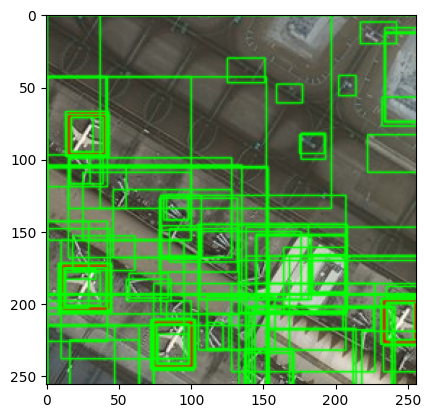

In [16]:
filename = "Week3/42845.jpg"
cv2.setUseOptimized(True)
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
rects = ss.process()
img_out = img.copy()
max_x = 0
for i, rect in (enumerate(rects)):
    if i < 100:
        x,y,w,h = rect
        cv2.rectangle(img_out, (x,y), (x+w, y+h), (0,255,0), 1, cv2.LINE_AA)
plt.imshow(img_out)

In [17]:
with open("/home/tuandinh/Desktop/Computer Vision ITMO/Week3/Comp_Vision_Task_3_model/Comp_Vision_Task_3_model.json") as f:
    config = json.load(f)
config = json.dumps(config)
loaded_model = tf.keras.models.model_from_json(config)
loaded_model.load_weights("/home/tuandinh/Desktop/Computer Vision ITMO/Week3/Comp_Vision_Task_3_model/ieeercnn_vgg16_1.h5")

2023-05-13 17:17:28.004700: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


In [18]:
array = []
a = [1,2,3,4]
array.append(a)
array

[[1, 2, 3, 4]]

1/1 [==============================] - 0s 209ms/step


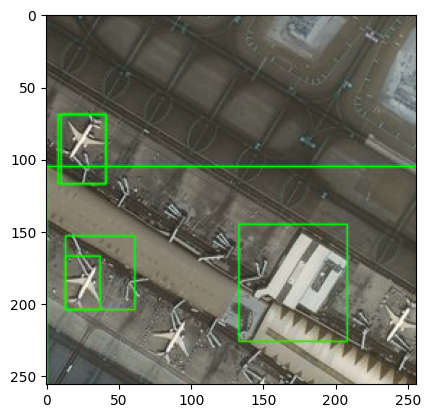

In [19]:

filename = "/home/tuandinh/Desktop/Computer Vision ITMO/Week3/data/Images/42845.jpg"
img = cv2.imread(filename)
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = img.copy()
out_prob =[]
out_coordinat = []
count = 0
for e,result in enumerate(ssresults):
    if e < 10000:
        x,y,w,h = result
        timage = imout[y: y + h,x: x + w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis = 0)
        out= loaded_model.predict(img)
        if out[0][0] > 0.65:
            count = count + 1
            # de xem cai probavility nao lon nhat va nho nhat
            out_prob.append(out[0][0])
            # cos the luu la [x,y,w,h] luon de de tinh dap an hon
            out_coordinat.append([x,y,x+w,y+h])
            cv2.rectangle(imout, (x, y), (x + w, y + h), (0, 255, 0), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)

In [20]:
out_prob

[0.83369637, 0.78416395, 0.7206332, 0.74239266, 0.7427307, 0.73654497]

In [21]:
out_coordinat

[[8, 69, 41, 117],
 [13, 167, 37, 204],
 [10, 69, 41, 117],
 [13, 153, 61, 204],
 [133, 145, 208, 226],
 [0, 105, 256, 256]]